<a href="https://colab.research.google.com/github/Whaleman0423/class_no.4_paper/blob/main/MobileNetV2_scooters1106.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras import datasets, models, layers, utils, activations, losses, optimizers, metrics
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow 
import glob 
from tqdm import tqdm 
from sklearn.model_selection import train_test_split
import pandas as pd
import cv2
from PIL import Image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout

In [19]:
os.chdir("/content/drive/MyDrive/Tebame_第四組_機車辨識")

In [20]:
trans = ["s2", "gp", "krv", "fiddle", "sr", "vivo", "famous", "drg", "duke", "limi", "gryphus6", "force", "viva", "s3", "like", "many", "bws", "sl", "axiz", "jog"]
s2 = glob.glob("./原始照片(含外拍及網路)/GOGORO_S2/*.jpg") + glob.glob("./裁剪照片(不含不用裁的)/GOGORO_S2_裁/*.jpg") + glob.glob("./原始照片(含外拍及網路)/GOGORO_S2/*.JPG") + glob.glob("./裁剪照片(不含不用裁的)/GOGORO_S2_裁/*.JPG") 

gp = glob.glob("./原始照片(含外拍及網路)/KYMCO_GP/*") + glob.glob("./裁剪照片(不含不用裁的)/KYMCO_GP_125_裁/*") 

krv = glob.glob("./原始照片(含外拍及網路)/KYMCO_KRV/*") + glob.glob("./裁剪照片(不含不用裁的)/KYMCO_KRV_裁/*")

fiddle = glob.glob("./原始照片(含外拍及網路)/SYM_FIDDLE/*") + glob.glob("./裁剪照片(不含不用裁的)/SYM_FIDDLE_125_裁/*") 

sr = glob.glob("./原始照片(含外拍及網路)/SYM_JET_SR/*") + glob.glob("./裁剪照片(不含不用裁的)/SYM_JET_SR_125_裁/*")

vivo = glob.glob("./原始照片(含外拍及網路)/SYM_活力/*") + glob.glob("./裁剪照片(不含不用裁的)/SYM_活力_125_裁/*")

famous = glob.glob("./原始照片(含外拍及網路)/KYMCO_新名流/*") + glob.glob("./裁剪照片(不含不用裁的)/KYMCO_新名流125_裁/*")

drg = glob.glob("./原始照片(含外拍及網路)/SYM_DRG/*") + glob.glob("./裁剪照片(不含不用裁的)/SYM_DRG_裁/*") 

duke = glob.glob("./原始照片(含外拍及網路)/SYM_新迪爵/*") + glob.glob("./裁剪照片(不含不用裁的)/SYM_新迪爵_125 _裁/*")

limi = glob.glob("./原始照片(含外拍及網路)/YAMAHA_LIMI/*") + glob.glob("./裁剪照片(不含不用裁的)/YAMAHA_LIMI_125_已裁減/*")

gryphus6 = glob.glob("./原始照片(含外拍及網路)/YAMAHA_六代勁戰/*") + glob.glob("./裁剪照片(不含不用裁的)/YAMAHA_六代勁戰_125_裁/*")



force = glob.glob("./原始照片(含外拍及網路)/YAMAHA_FORCE/*") + glob.glob("./裁剪照片(不含不用裁的)/YAMAHA_FORCE_裁/*")

viva = glob.glob("./原始照片(含外拍及網路)/GOGORO_VIVA_MIX/*") + glob.glob("./裁剪照片(不含不用裁的)/GOGORO_VIVA_MIX_裁/*")

s3 = glob.glob("./原始照片(含外拍及網路)/GOGORO_S3/*") + glob.glob("./裁剪照片(不含不用裁的)/GOGORO_S3_裁/*")

like = glob.glob("./原始照片(含外拍及網路)/KYMCO_LIKE/*") + glob.glob("./裁剪照片(不含不用裁的)/KYMCO_LIKE_125_裁/*")

many = glob.glob("./原始照片(含外拍及網路)/KYMCO_MANY/*") + glob.glob("./裁剪照片(不含不用裁的)/KYMCO_MANY_125_裁/*")

bws = glob.glob("./原始照片(含外拍及網路)/YAMAHA_BWS/*") + glob.glob("./裁剪照片(不含不用裁的)/YAMAHA_BWS_125_裁/*")

sl = glob.glob("./原始照片(含外拍及網路)/SYM_JET_SL/*") + glob.glob("./裁剪照片(不含不用裁的)/SYM_JET_SL_125_裁/*")

axiz = glob.glob("./原始照片(含外拍及網路)/YAMAHA_勁豪/*") + glob.glob("./裁剪照片(不含不用裁的)/YAMAHA_勁豪_125_裁/*")

jog = glob.glob("./原始照片(含外拍及網路)/YAMAHA_JOG/*") + glob.glob("./裁剪照片(不含不用裁的)/YAMAHA_JOG_125_裁/*")

In [21]:
print(len(trans))

20


In [22]:
import pandas as pd
df = pd.DataFrame({
    "path": s2 + gp + krv + fiddle + sr + vivo + famous + drg + duke + limi + gryphus6 + force + viva + s3 + like + many + bws + sl + axiz + jog,
    "ans": [0] * len(s2) + [1] * len(gp) + [2] * len(krv) + [3] * len(fiddle) + [4] * len(sr) + [5] * len(vivo) + [6] * len(famous)
    + [7] * len(drg) + [8] * len(duke) + [9] * len(limi) + [10] * len(gryphus6) + [11] * len(force) + [12] * len(viva) + [13] * len(s3)
     + [14] * len(like) + [15] * len(many) + [16] * len(bws) + [17] * len(sl) + [18] * len(axiz) + [19] * len(jog)
})
df

,path,ans
0,./原始照片(含外拍及網路)/GOGORO_S2/180831qbt797we2t_medi...,0
1,./原始照片(含外拍及網路)/GOGORO_S2/02_s2_abs_indigo_05_f...,0
2,./原始照片(含外拍及網路)/GOGORO_S2/01_s2_abs_indigo_03_l...,0
3,./原始照片(含外拍及網路)/GOGORO_S2/1527683192-25814e6d13...,0
4,./原始照片(含外拍及網路)/GOGORO_S2/3FA8F684E6-SP-9712488...,0
...,...,...
13837,./裁剪照片(不含不用裁的)/YAMAHA_JOG_125_裁/121920.jpg,19
13838,./裁剪照片(不含不用裁的)/YAMAHA_JOG_125_裁/IMG_1513.JPG,19
13839,./裁剪照片(不含不用裁的)/YAMAHA_JOG_125_裁/IMG_1517.JPG,19
13840,./裁剪照片(不含不用裁的)/YAMAHA_JOG_125_裁/IMG_1518.JPG,19


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[ 961 1081  898 1317  793  914  893  900 1197  786 1316  287  132  414
  331  477   99  448  461  137]


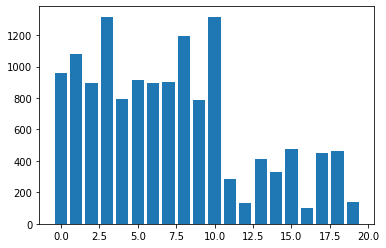

In [23]:
list_ = [i for n, i in enumerate(df["ans"])]
cls, count = np.unique(list_, return_counts=True)
plt.bar(cls, count)
print(cls, count, sep="\n")
# trans = ["s2", "gp", "krv", "fiddle", "sr", "vivo", "famous", "drg", "duke", "limi", "gryphus6", "force", "viva", "s3", "like", "many", "bws", "sl", "axiz", "jog"]


./原始照片(含外拍及網路)/GOGORO_VIVA_MIX/120855.jpg
[[[-0.5294118  -0.5294118  -0.54509807]
  [-0.54509807 -0.5529412  -0.56078434]
  [-0.54509807 -0.54509807 -0.54509807]
  ...
  [ 0.16078436  0.09803927  0.03529418]
  [ 0.00392163 -0.03529412 -0.0745098 ]
  [ 0.56078434  0.5529412   0.5294118 ]]

 [[-0.5372549  -0.5294118  -0.54509807]
  [-0.5529412  -0.54509807 -0.56078434]
  [-0.58431375 -0.5764706  -0.5764706 ]
  ...
  [ 0.60784316  0.5686275   0.5372549 ]
  [ 0.5058824   0.45882356  0.41176474]
  [ 0.04313731 -0.04313725 -0.06666666]]

 [[-0.5294118  -0.52156866 -0.5529412 ]
  [-0.54509807 -0.5529412  -0.5686275 ]
  [-0.6        -0.6313726  -0.62352943]
  ...
  [ 0.02745104 -0.00392157 -0.02745098]
  [ 0.5137255   0.47450984  0.43529415]
  [ 0.5058824   0.43529415  0.4039216 ]]

 ...

 [[-0.7882353  -0.79607844 -0.827451  ]
  [-0.5529412  -0.56078434 -0.5921569 ]
  [-0.52156866 -0.5294118  -0.54509807]
  ...
  [-0.5058824  -0.5764706  -0.6156863 ]
  [-0.4980392  -0.58431375 -0.62352943]
  

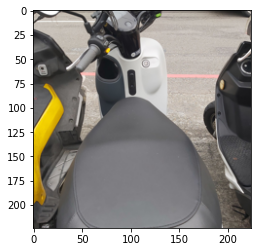

In [24]:
p = df["path"]

idx = np.random.randint(0, len(p), size=1)[0]  # 隨機取一張圖
# idx
path = p[idx]
# print(path.shape)

# img = cv2.imread(path)
# plt.imshow(img[:, :, ::-1])

img = Image.open(path).resize((224, 224)).convert("RGB")
img_np = np.array(img)
print(path)
img_np_pre = preprocess_input(img_np)
print(img_np_pre)
plt.imshow(img)
# print(img)

In [25]:
# clear graph
tensorflow.keras.backend.clear_session() 

In [26]:
base_model = MobileNetV2(
    include_top=False, weights='imagenet', input_shape=(224, 224, 3)
)
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.25)(x)
predictions = layers.Dense(20, activation='softmax')(x)

# Freeze layers 凍結層 把遷移來的卷積的參數固定
for l in base_model.layers:
  l.trainable = False

# 把卷積和後面的分類層合在一起
model = models.Model(base_model.input, predictions)
model.summary()
# base_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [27]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(
        loss=SparseCategoricalCrossentropy(),
        optimizer="adam",
        metrics=["acc"]
)

In [28]:
x = np.array(df["path"])
y = np.array(df["ans"])

In [29]:
def data_generator(x, y, batch_size=20):
  while True:
    idx = np.random.randint(0, len(x), size=batch_size)
    x_batch, y_batch = x[idx], y[idx]
    x_final = []
    for path in x_batch:
      img = Image.open(path).resize((224, 224)).convert("RGB")    #  開啟路徑圖檔並改大小、轉成RGB
      img_pre = preprocess_input(np.array(img))              # 轉成陣列再預處理
      x_final.append(img_pre)            
    x_final = np.array(x_final)
    y_batch = np.array(y_batch)
    yield (x_final, y_batch)
gen = data_generator(x, y)
x_gen, y_gen = gen.__next__()
# print(x_gen.shape)
# print(y_gen.shape)
print(x_gen)
# print(y_gen)


[[[[ 0.6627451   0.654902    0.6392157 ]
   [ 0.67058825  0.6627451   0.64705884]
   [ 0.6784314   0.67058825  0.654902  ]
   ...
   [ 0.8039216   0.7490196   0.64705884]
   [ 0.8039216   0.75686276  0.64705884]
   [ 0.81960785  0.77254903  0.67058825]]

  [[ 0.7019608   0.69411767  0.6784314 ]
   [ 0.6784314   0.6627451   0.64705884]
   [ 0.6784314   0.6627451   0.64705884]
   ...
   [ 0.99215686  0.9764706   0.6862745 ]
   [ 0.99215686  0.96862745  0.6862745 ]
   [ 0.99215686  0.96862745  0.6862745 ]]

  [[ 0.6862745   0.67058825  0.654902  ]
   [ 0.6862745   0.67058825  0.654902  ]
   [ 0.6862745   0.6627451   0.6392157 ]
   ...
   [ 1.          0.99215686  0.6862745 ]
   [ 1.          1.          0.69411767]
   [ 0.99215686  0.99215686  0.69411767]]

  ...

  [[ 0.12941182  0.12156868  0.15294123]
   [ 0.1686275   0.13725495  0.17647064]
   [-0.05098039 -0.05098039 -0.00392157]
   ...
   [ 0.16078436  0.12941182  0.11372554]
   [ 0.12156868  0.12941182  0.12941182]
   [ 0.11372554 

In [30]:
from sklearn.model_selection import train_test_split
import numpy as np

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(12457,)
(1385,)
(12457,)
(1385,)


In [31]:
train_generator = data_generator(x_train, y_train)
test_generator = data_generator(x_test, y_test)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
             EarlyStopping(patience=12, restore_best_weights=True),
             ModelCheckpoint("/content/1106all.h5", save_best_only=True)
]

model.fit(
    train_generator,
    steps_per_epoch=30,
    epochs=300,
    validation_data=test_generator,
    validation_steps=3, 
    callbacks=callbacks
                    )

Epoch 1/300
17/30 [================>.............] - ETA: 1:18 - loss: 3.2203 - acc: 0.1000